In [2]:
from plotnine.data import *
from plotnine import *
from matplotlib import ticker
import sys
sys.path.append('.')
sys.path.append('..')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import mne
import pandas as pd
import seaborn.objects as so
from tqdm import tqdm
from matplotlib.pyplot import MultipleLocator

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.


### default parapmeters

In [3]:
plt.rcParams['font.size'] = '5'
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'

cm = 1/2.54
# 每次调用font dict

# red
red = '#A9373B'
blue = '#2369BD'
orange = '#CC8963'
green = '#009944'
fontdict = dict(fontsize=7, family='Arial')

sns.set_theme(style='ticks',font='Arial',rc={"lines.linewidth": 1,'font.size':5,'legend.fontsize':5,'legend.title_fontsize':5,'axes.labelsize':5,'xtick.labelsize':5,'ytick.labelsize':5,})

# Fig 3(a) :comparison

In [6]:
compare = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'classification.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification.csv')
        compare.append(f)

compare = pd.concat(compare, ignore_index=True)
compare = compare.groupby(
    ['subject', 'winLEN', 'method'], as_index=False).mean()
compare.head()

,subject,winLEN,method,Unnamed: 0,accuracy,ITR,bps,cv,seed,score
0,chenyuzhen,0.1,SSVEP,17.5,0.540625,209.098038,20.909804,3.5,0.0,0.571875
1,chenyuzhen,0.1,WN,57.5,0.693750,306.279879,30.627988,3.5,0.0,0.728125
2,chenyuzhen,0.2,SSVEP,18.5,0.796875,354.995530,20.708073,3.5,0.0,0.875000
3,chenyuzhen,0.2,WN,58.5,0.937500,416.652238,24.304714,3.5,0.0,0.956250
4,chenyuzhen,0.3,SSVEP,19.5,0.931250,358.526091,15.934493,3.5,0.0,0.950000


In [15]:
pickSUB = ['chenyuzhen','fanzixiao','huangzixun','jiaqi','jingyi','liangfangshuo','libowen','lijiayang','miaoyining','quyuxin','shixinge','suxiaohan','wangchaoying','xuwenjia','yangyuxing','yaofeifan','zhaoxinyu','zhouyuqing']

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_46197/3903957192.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


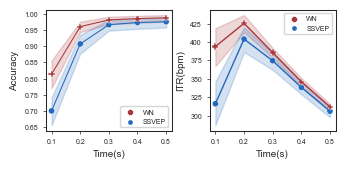

In [8]:
sns.set_theme(style='ticks')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9.5*cm,4*cm))

plt.subplots_adjust(wspace=0.3)

f = compare[compare.subject.isin(pickSUB)]
fAve = f.groupby(['winLEN','method'],as_index=False).mean()

sns.lineplot(data=f, x='winLEN', y='accuracy', hue='method', ax=ax1, linewidth=0.75,
             err_style='band', dashes=True, legend=False, markers=True,palette=[red,blue],hue_order=['WN','SSVEP'])

sns.scatterplot(data=fAve, x='winLEN', y='accuracy',
                hue='method', ax=ax1, style='method', s=20, markers=['o', 'P'],palette=[red,blue],hue_order=['WN','SSVEP'])

sns.lineplot(data=f, x='winLEN', y='ITR', hue='method', ax=ax2, linewidth=1,
             err_style='band', dashes=True, legend=False, palette=[red, blue], hue_order=['WN', 'SSVEP'])

sns.scatterplot(data=fAve, x='winLEN', y='ITR',
                hue='method', ax=ax2, style='method', s=20, markers=['o', 'P'], palette=[red, blue], hue_order=['WN', 'SSVEP'])


ax1.set_ylabel('Accuracy',fontdict=fontdict)
ax2.set_ylabel('ITR(bpm)', fontdict=fontdict)

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xlabel('Time(s)',fontdict=fontdict)
    ax.legend(fontsize=5, markerscale=0.4)
    
plt.show()

fig.savefig('../images/mainFig3/fig3a.png', dpi=400, bbox_inches='tight')
fig.savefig('../images/mainFig3/fig3a.svg', dpi=400, bbox_inches='tight')

# Fig 3(b) : Highest ITR

In [16]:
highITR = []

for subject in pickSUB:
    for method in compare.method.unique():
            f = compare[(compare.subject == subject) & (compare.method == method)]
            highITR.append(f.iloc[f['ITR'].argmax(), :].T)

highITR = pd.concat(highITR, ignore_index=False, axis=1).T
highITR.groupby(['subject','method']).mean()
highITR.head()

,subject,winLEN,method,Unnamed: 0,accuracy,ITR,bps,cv,seed,score
4,chenyuzhen,0.3,SSVEP,19.5,0.93125,358.526091,15.934493,3.5,0.0,0.95
3,chenyuzhen,0.2,WN,58.5,0.9375,416.652238,24.304714,3.5,0.0,0.95625
22,fanzixiao,0.2,SSVEP,18.5,0.903125,406.515713,23.713417,3.5,0.0,0.94375
23,fanzixiao,0.2,WN,58.5,0.996875,452.942451,26.421643,3.5,0.0,0.996875
52,huangzixun,0.2,SSVEP,18.5,0.9,420.644361,24.537588,3.5,0.0,0.9625


In [17]:
highITR = []

for subject in pickSUB:
    for method in compare.method.unique():
            f = compare[(compare.subject == subject) & (compare.method == method)]
            highITR.append(f.iloc[f['ITR'].argmax(), :].T)

highITR = pd.concat(highITR, ignore_index=False, axis=1).T
highITR.groupby('method').mean()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_46197/1344115669.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,winLEN,Unnamed: 0,accuracy,ITR,bps,cv,seed,score
method,,,,,,,,
SSVEP,0.216667,18.666667,0.929167,405.975084,22.853835,3.5,0.0,0.951736
WN,0.177778,58.277778,0.944444,430.273392,29.484588,3.5,0.0,0.953472


In [18]:
highITR.subject.unique()

array(['chenyuzhen', 'fanzixiao', 'huangzixun', 'jiaqi', 'jingyi',
       'liangfangshuo', 'libowen', 'lijiayang', 'miaoyining', 'quyuxin',
       'shixinge', 'suxiaohan', 'wangchaoying', 'xuwenjia', 'yangyuxing',
       'yaofeifan', 'zhaoxinyu', 'zhouyuqing'], dtype=object)

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1.1811023622047243 x 1.574803149606299 in image.
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../images/mainFig3/fig3b.svg
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1.1811023622047243 x 1.574803149606299 in image.
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../images/mainFig3/fig3b.png


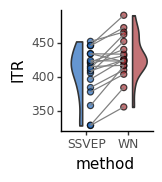

<ggplot: (8769748343116)>

In [19]:
import pandas.api.types as pdtypes


highITR['method'] = highITR['method'].astype(
    pdtypes.CategoricalDtype(categories=['SSVEP', 'WN']))


highITR['ITR'] = highITR['ITR'].astype('float64')

x = stage('when', after_scale='x+shift*alt_sign(x)')
shift = 0.1

def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    return (-1) ** x

# shift outward
m1 = aes(x=stage('method', after_scale='x+shift*alt_sign(x)'), group='method')
m2 = aes(x=stage('method', after_scale='x-shift*alt_sign(x)'),
         group='subject')  # shift inward

lsize = 0.65
fill_alpha = 0.7

fig = (ggplot(highITR, aes('method', 'ITR', fill='method'),)
       + theme_classic()
       + theme(figure_size=(3*cm, 4*cm))

       + geom_violin(m1, style='left-right', alpha=fill_alpha,
                     size=lsize, show_legend=False)
       + geom_point(m2, alpha=0.7, size=2, show_legend=False)
       + geom_line(m2, color='gray')
    #    + geom_boxplot(m1, width=shift, show_legend=False)
       + scale_fill_manual(values=[blue, red])

       )
fig.save(filename='../images/mainFig3/fig3b.svg', dpi=300)
fig.save(filename='../images/mainFig3/fig3b.png', dpi=300)
fig

# Fig3(c) Parameters

## (c1) montage

In [20]:
montage = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'montage.csv'):
        f = pd.read_csv(subFolder+os.sep+'montage.csv')
        montage.append(f)

montage = pd.concat(montage, ignore_index=True)
montage = montage.groupby(
    ['monatage','subject', 'winLEN', 'method',], as_index=False).mean()
montage.head()

,monatage,subject,winLEN,method,Unnamed: 0,accuracy,ITR,cv
0,All,chenyuzhen,0.1,SSVEP,377.5,0.568750,208.530827,3.5
1,All,chenyuzhen,0.1,WN,177.5,0.721875,301.621988,3.5
2,All,chenyuzhen,0.2,SSVEP,378.5,0.881250,359.424900,3.5
3,All,chenyuzhen,0.2,WN,178.5,0.953125,414.526407,3.5
4,All,chenyuzhen,0.3,SSVEP,379.5,0.959375,365.535448,3.5


In [21]:
highMontage = []

for subject in pickSUB:
        for method in montage.method.unique():
                for m in montage.monatage.unique():
                        f = montage[(montage.subject==subject)&(montage.method==method)&(montage.monatage==m)]
                        highMontage.append(f.iloc[f['ITR'].argmax(), :].T)

highMontage = pd.concat(highMontage,ignore_index=False,axis=1).T

order = ['classical', 'Occipital', 'Parieto-occipital', 'All']
highMontage['monatage'] = pd.Categorical(
highMontage['monatage'], categories=order, ordered=True)


In [22]:
diff = []
for subject in highMontage.subject.unique():
    f = highMontage[highMontage.subject == subject]
    f = f.pivot_table(index='monatage', columns='method', values='ITR')
    f['diff'] = f['WN']-f['SSVEP']
    f['subject'] = subject
    f = f.reset_index()
    diff.append(f)
diff = pd.concat(diff, axis=0, ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


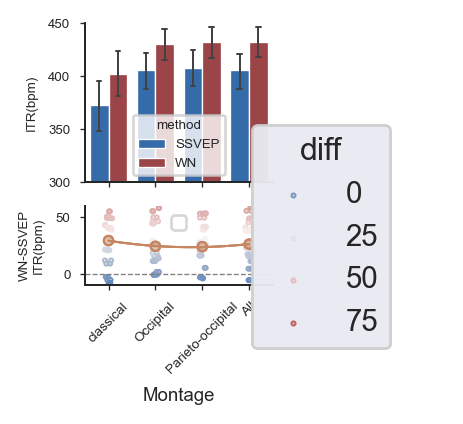

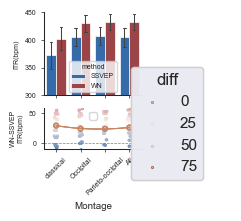

In [26]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 1, 'font.size': 5, 'legend.fontsize': 5,
                                               'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1, ax2) = plt.subplots(figsize=(3.2*cm, 4.5*cm),
                               nrows=2, ncols=1, height_ratios=[2, 1])

ax1.set_ylim(300, 450)
ax2.set_ylim(-10, 60)

ax2.axhline(y=0, color="gray", linestyle="--", linewidth=0.5)

sns.despine()

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xlabel('Train Size', fontdict=fontdict)
    ax.legend(fontsize=7)


sns.barplot(data=highMontage[highMontage.monatage != 'Central occipital'], x='monatage', y='ITR', hue='method',
            ax=ax1, linewidth=0.5, errwidth=0.75, capsize=0.1, palette=[blue,red], hue_order=['SSVEP', 'WN'])


ax1.set_xlabel([])
ax1.set_xticklabels([])
ax1.set_ylabel('ITR(bpm)')

ax2.xaxis.set_tick_params(rotation=45)

(
    so.Plot(diff[diff.monatage != 'Central occipital'], x='monatage', y='diff',color='diff')
    .on(ax2)
    .add(so.Dots(pointsize=1.5), so.Jitter(.2),)
    .scale(color='vlag')
    .save('../images/mainFig3/fig4c1.svg', dpi=300)
    .save('../images/mainFig3/fig4c1.png', dpi=300,bbox_inches='tight')
)

(
    so.Plot(diff[diff.monatage != 'Central occipital'], x='monatage', y='diff',)
    .on(ax2)
    .add(so.Line(linewidth=0.75, color='#C68662'), so.PolyFit(),)
    .add(so.Dots(pointsize=3.5, color='#C68662'), so.Agg(),)
    .label(x='Montage', y='WN-SSVEP\nITR(bpm)')
    .save('../images/mainFig3/fig3c1.svg', dpi=300)
    .save('../images/mainFig3/fig3c1.png', dpi=300, bbox_inches='tight')
)


## (c2) trainsize

In [27]:
trainsize = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'trainSize.csv'):
        f = pd.read_csv(subFolder+os.sep+'trainSize.csv')
        trainsize.append(f)

trainsize = pd.concat(trainsize, ignore_index=True)
trainsize = trainsize.groupby(['subject','winLEN','trainsize','method'],as_index=False).mean()
trainsize.head()

,subject,winLEN,trainsize,method,Unnamed: 0,accuracy,ITR,cv
0,chenyuzhen,0.1,2,SSVEP,217.5,0.400000,119.246402,3.5
1,chenyuzhen,0.1,2,WN,17.5,0.468750,152.810303,3.5
2,chenyuzhen,0.1,3,SSVEP,257.5,0.453125,144.581552,3.5
3,chenyuzhen,0.1,3,WN,57.5,0.628125,242.377287,3.5
4,chenyuzhen,0.1,4,SSVEP,297.5,0.512500,175.937092,3.5


In [28]:
highTrain = []

for subject in pickSUB:
        for method in trainsize.method.unique():
                for size in trainsize.trainsize.unique():
                        f = trainsize[(trainsize.subject==subject)&(trainsize.method==method)&(trainsize.trainsize==size)]
                        highTrain.append(f.iloc[f['ITR'].argmax(), :].T)
highTrain = pd.concat(highTrain,ignore_index=False,axis=1).T

In [29]:
diff = []
for subject in highTrain.subject.unique():
    f = highTrain[highTrain.subject==subject]
    f = f.pivot_table(index='trainsize',columns='method',values='ITR')
    f['diff'] = f['WN']-f['SSVEP']
    f['subject'] = subject
    f = f.reset_index()
    diff.append(f)
diff = pd.concat(diff,axis=0,ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


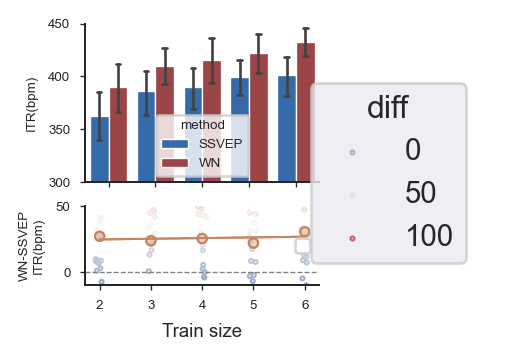

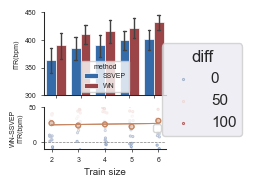

In [31]:

sns.set_theme(style='ticks',font='Arial',rc={"lines.linewidth": 1,'font.size':5,'legend.fontsize':5,'legend.title_fontsize':5,'axes.labelsize':5,'xtick.labelsize':5,'ytick.labelsize':5,})

fig, (ax1, ax2) = plt.subplots(figsize=(4*cm, 4.5*cm),
                               nrows=2, ncols=1, height_ratios=[2, 1])

ax1.set_ylim(300, 450)
ax2.set_ylim(-10, 50)
ax2.axhline(y=0, color="gray", linestyle="--",linewidth=0.5)

sns.despine()

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xlabel('Train Size', fontdict=fontdict)
    ax.legend(fontsize=7)


sns.barplot(data=highTrain, x='trainsize', y='ITR', hue='method',
            ax=ax1, linewidth=0.5, errwidth=1, capsize=0.1, palette=[blue, red], hue_order=['SSVEP', 'WN'])

ax1.set_xlabel([])
ax1.set_xticklabels([])
ax1.set_ylabel('ITR(bpm)')

(
    so.Plot(diff, x='trainsize', y='diff',color='diff')
    .on(ax2)
    .add(so.Dots(pointsize=1.5), so.Jitter(.2),)
    .scale(color='vlag')
    .save('../images/mainFig3/fig3c2.svg', dpi=300)
)

(
    so.Plot(diff, x='trainsize', y='diff',)
    .on(ax2)
    .add(so.Line(linewidth=0.75, color='#C68662'), so.PolyFit(order=1),)
    .add(so.Dots(pointsize=3.5, color='#C68662'), so.Agg(),)
    .label(x='Train size', y='WN-SSVEP\nITR(bpm)')
    .save('../images/mainFig3/fig3c2.svg', dpi=300)
)


## (c3) Bands

In [32]:
bands = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'bands.csv'):
        f = pd.read_csv(subFolder+os.sep+'bands.csv')
        bands.append(f)

bands = pd.concat(bands, ignore_index=True)
bands = bands.groupby(
    ['subject', 'winLEN', 'method', 'band'], as_index=False).mean()
bands.head()

,subject,winLEN,method,band,Unnamed: 0,accuracy,ITR,cv
0,chenyuzhen,0.1,SSVEP,1,217.5,0.362500,103.958946,3.5
1,chenyuzhen,0.1,SSVEP,2,257.5,0.459375,149.650390,3.5
2,chenyuzhen,0.1,SSVEP,3,297.5,0.500000,170.482229,3.5
3,chenyuzhen,0.1,SSVEP,4,337.5,0.540625,192.146123,3.5
4,chenyuzhen,0.1,SSVEP,5,377.5,0.571875,209.098038,3.5


In [33]:
highBand = []

for subject in pickSUB:
    for method in bands.method.unique():
        for b in bands.band.unique():
            f = bands[(bands.subject==subject)&(bands.method==method)&(bands.band==b)]
            highBand.append(f.iloc[f['ITR'].argmax(), :].T)

highBand = pd.concat(highBand,ignore_index=False,axis=1).T

In [34]:
diff = []
for subject in highBand.subject.unique():
    f = highBand[highBand.subject == subject]
    f = f.pivot_table(index='band', columns='method', values='ITR')
    f['diff'] = f['WN']-f['SSVEP']
    f['subject'] = subject
    f = f.reset_index()
    diff.append(f)
diff = pd.concat(diff, axis=0, ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


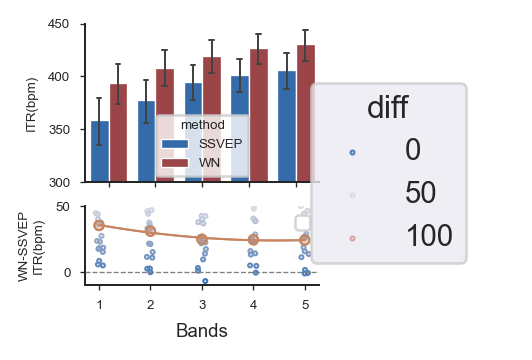

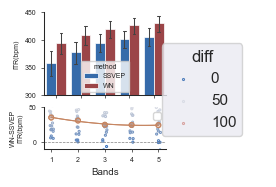

In [36]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 1, 'font.size': 5, 'legend.fontsize': 5,
                                               'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1, ax2) = plt.subplots(figsize=(4*cm, 4.5*cm),
                               nrows=2, ncols=1, height_ratios=[2, 1])

ax1.set_ylim(300, 450)
ax2.set_ylim(-10, 50)

ax2.axhline(y=0, color="gray", linestyle="--", linewidth=0.5)

sns.despine()

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xlabel('Train Size', fontdict=fontdict)
    ax.legend(fontsize=7)


sns.barplot(data=highBand, x='band', y='ITR', hue='method',
            ax=ax1, linewidth=0.5, errwidth=0.75, capsize=0.1, palette=[blue, red], hue_order=['SSVEP', 'WN'])

ax1.set_xlabel([])
ax1.set_xticklabels([])
ax1.set_ylabel('ITR(bpm)')

(
    so.Plot(diff, x='band', y='diff',color='diff')
    .on(ax2)
    .add(so.Dots(pointsize=1.5), so.Jitter(.2),)
    .scale(color='vlag')
    .save('../images/mainFig3/fig3c3.svg', dpi=300)
)

(
    so.Plot(diff, x='band', y='diff',)
    .on(ax2)
    .add(so.Line(linewidth=0.75, color='#C68662'), so.PolyFit(order=2),)
    .add(so.Dots(pointsize=3.5, color='#C68662'), so.Agg(),)
    .label(x='Bands', y='WN-SSVEP\nITR(bpm)')
    .save('../images/mainFig3/fig3c3.svg', dpi=300)
)


# Fig3(d) Tempooral Spetral representation

## (d1) topo

In [4]:
pattern = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'pattern.csv'):
        f = pd.read_csv(subFolder+os.sep+'pattern.csv')
        pattern.append(f)

pattern = pd.concat(pattern, ignore_index=True)
chNames = pattern.loc[(pattern.subject == 'yangyuxing')
                      & (pattern.winLEN == 0.1) & (pattern.method == 'WN'), 'channel'].to_numpy().tolist()
pattern.head()

,Unnamed: 0,channel,band,w,winLEN,method,subject
0,0,FP1,0,0.037211,0.02,WN,yangyuxing
1,1,FPZ,0,-0.012494,0.02,WN,yangyuxing
2,2,FP2,0,-0.011913,0.02,WN,yangyuxing
3,3,AF3,0,0.020066,0.02,WN,yangyuxing
4,4,AF4,0,-0.020422,0.02,WN,yangyuxing


/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1191373346.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1191373346.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


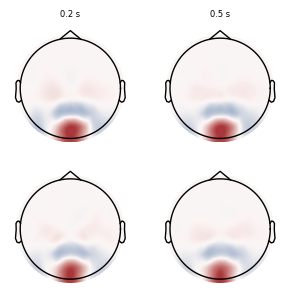

In [5]:
from mne.viz import plot_topomap

winLENs = [0.2,0.5]


wnPattern = pattern[(pattern.subject.isin(pickSUB))
                        & (pattern.method == 'WN')].groupby(['channel','winLEN'], as_index=False).mean()

ssvepPattern = pattern[(pattern.subject.isin(pickSUB))
                        & (pattern.method == 'SSVEP')].groupby(['channel','winLEN'], as_index=False).mean()

vmin = np.min([wnPattern['w'].min(), ssvepPattern['w'].min()])
vmax = np.max([wnPattern['w'].max(), ssvepPattern['w'].max()])

info = mne.create_info(ch_names=ssvepPattern[ssvepPattern.winLEN==0.1].channel.to_numpy().tolist(), sfreq=250, ch_types='eeg')
fname = 'montage.loc'
montage = mne.channels.read_custom_montage(fname)
info.set_montage(montage)

m = sns.color_palette("vlag", as_cmap=True)
fig,axes = plt.subplots(2,2,figsize=(4.5*2*cm,7.8*cm))

for i,(winLEN,axs) in enumerate(zip(winLENs,axes.T)):

    w1 = wnPattern[wnPattern.winLEN == winLEN].w
    w2 = ssvepPattern[ssvepPattern.winLEN == winLEN].w

    plot_topomap(data=w1, pos=info, cmap=m, contours=0,
                    image_interp='cubic', axes=axs[0], show=False,sensors=False)

    plot_topomap(data=w2, pos=info, cmap=m, contours=0,
                 image_interp='cubic', axes=axs[1], show=False, sensors=False)

    axs[0].set_title('%s s'%winLEN)

plt.show()
fig.savefig('../images/mainFig3/fig3c.svg',dpi=300)
fig.savefig('../images/mainFig3/fig3c.png',dpi=300)

## (d2) signal spectral temporal 

In [6]:
evokeds = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'evoked.csv'):
        f = pd.read_csv(subFolder+os.sep+'evoked.csv')
        evokeds.append(f)

evokeds = pd.concat(evokeds, ignore_index=True)
evokeds.head()

,Unnamed: 0,class,time,evoked,tag,subject,filtered
0,0,1,0.0,0.001968,WN,yangyuxing,no
1,1,2,0.0,-0.136521,WN,yangyuxing,no
2,2,3,0.0,-0.068320,WN,yangyuxing,no
3,3,4,0.0,0.035030,WN,yangyuxing,no
4,4,5,0.0,0.099347,WN,yangyuxing,no


In [13]:
coefs = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'coef.csv'):
        f = pd.read_csv(subFolder+os.sep+'coef.csv')
        coefs.append(f)

coefs = pd.concat(coefs, ignore_index=True)
coefs.head()

,Unnamed: 0,j,i,rho,subject,method,winLEN
0,0,1,1,2.185500,yangyuxing,WN,0.2
1,1,2,1,0.356605,yangyuxing,WN,0.2
2,2,3,1,-0.245055,yangyuxing,WN,0.2
3,3,4,1,-0.961258,yangyuxing,WN,0.2
4,4,5,1,1.036193,yangyuxing,WN,0.2


In [14]:
psds = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'SxN.csv'):
        f = pd.read_csv(subFolder+os.sep+'SxN.csv')
        psds.append(f)

psds = pd.concat(psds, ignore_index=True)
psds.head()

,Unnamed: 0,label,f,psd,component,tag,subject,exp
0,0,1,0.0,8.873844e-44,X,WN,yangyuxing,compare
1,1,2,0.0,7.183736e-44,X,WN,yangyuxing,compare
2,2,3,0.0,2.414987e-44,X,WN,yangyuxing,compare
3,3,4,0.0,7.581690e-44,X,WN,yangyuxing,compare
4,4,5,0.0,3.163542e-44,X,WN,yangyuxing,compare


/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1422122555.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1422122555.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1422122555.py:58: UserWarning: 
The palette list has fewer values (1) than needed (40) and will cycle, which may produce an uninterpretable plot.
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_56432/1422122555.py:60: UserWarning: 
The palette list has fewer values (1) than needed (4

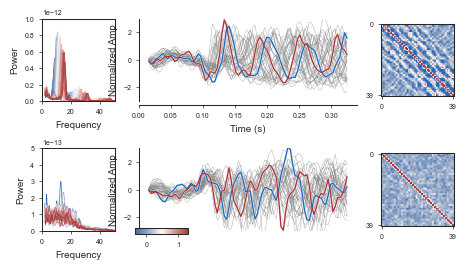

In [12]:

sns.set_theme(style='ticks',font='Arial',rc={"lines.linewidth": 1,'font.size':5,'legend.fontsize':5,'legend.title_fontsize':5,'axes.labelsize':5,'xtick.labelsize':5,'ytick.labelsize':5,})

fig = plt.figure(figsize=(13.5*cm, 7*cm))

plt.subplots_adjust(wspace=1, hspace=0.1)
ax10 = plt.subplot2grid((5, 9), (0, 0), colspan=2, rowspan=2)
ax20 = plt.subplot2grid((5, 9), (3, 0), colspan=2, rowspan=2)

ax11 = plt.subplot2grid((5, 9), (0, 2), colspan=5, rowspan=2)
axaxes = plt.subplot2grid((5, 9), (2, 2), colspan=5, rowspan=1)

ax21 = plt.subplot2grid((5, 9), (3, 2), colspan=5, rowspan=2)
ax12 = plt.subplot2grid((5, 9), (0, 7), colspan=2, rowspan=2)
ax22 = plt.subplot2grid((5, 9), (3, 7), colspan=2, rowspan=2)


for spine in ['top', 'right', 'bottom']:
    ax11.spines[spine].set_visible(False)
ax11.set_xticklabels([])
ax11.set_xticks([])

for spine in ['top', 'right', 'left']:
    axaxes.spines[spine].set_visible(False)
axaxes.spines['bottom'].set_position(('data', 1))
axaxes.set_yticklabels([])
axaxes.set_yticks([])
axaxes.set_xlim(0,0.34)

for spine in  ['top', 'right', 'bottom']:
    ax21.spines[spine].set_visible(False)
ax21.spines['bottom'].set_position(('data', 1))
ax21.set_xticklabels([])
ax21.set_xticks([])


aves = psds[(psds.subject.isin(pickSUB)) & (psds.component == 'sig') & (
    psds.f >2)].groupby(['f', 'tag', 'label'], as_index=False).mean()
sns.lineplot(data=aves[aves.tag == 'SSVEP'], x='f',
             y='psd', hue='label', ax=ax10, legend=False, linewidth=0.5,palette='vlag')
sns.lineplot(data=aves[aves.tag == 'WN'], x='f',
             y='psd', hue='label', ax=ax20, legend=False, linewidth=0.5, palette='vlag')

ax10.set_xlabel('Frequency',fontdict=fontdict)
ax20.set_xlabel('Frequency',fontdict=fontdict)
ax10.set_ylabel('Power',fontdict=fontdict)
ax20.set_ylabel('Power',fontdict=fontdict)
ax10.set_ylim(0,1*1e-12)
ax20.set_ylim(0,0.5*1e-12)
ax10.set_xlim(0,50)
ax20.set_xlim(0,50)


list = ['zhouyuqing']

aveSSVEP = evokeds[(evokeds.tag == 'SSVEP') & (evokeds.time < 0.34) & (evokeds.subject.isin(list)) & (
    evokeds['class'].isin(np.arange(41, 81, 1)))].groupby(['class', 'time','filtered'], as_index=False).mean()

sns.lineplot(data=aveSSVEP[aveSSVEP.filtered=='no'], x='time', y='evoked', hue='class',
             linewidth=1, palette=['white'], alpha=1, ax=ax11, legend=False)
sns.lineplot(data=aveSSVEP[aveSSVEP.filtered=='no'], x='time', y='evoked', hue='class',
             linewidth=0.3, palette=['gray'], alpha=0.7, ax=ax11, legend=False)


sns.lineplot(data=aveSSVEP[aveSSVEP['class'].isin([78, 79]) & (aveSSVEP.filtered == 'no')], x='time', y='evoked', hue='class',linewidth=1.5, palette=['white'], alpha=1,ax=ax11,legend=False)

sns.lineplot(data=aveSSVEP[aveSSVEP['class'].isin([78, 79]) & (aveSSVEP.filtered == 'no')], x='time', y='evoked', hue='class',linewidth=1, palette='vlag', alpha=1,ax=ax11,legend=False)


aveWN = evokeds[(evokeds.tag == 'WN') & (evokeds.time < 0.34) & (evokeds.subject.isin(list)) & (
    evokeds['class'].isin(np.arange(1, 40, 1)))].groupby(['class', 'time','filtered'], as_index=False).mean()

sns.lineplot(data=aveWN[aveWN.filtered=='no'], x='time', y='evoked', hue='class',
             linewidth=0.3, palette=['gray'], alpha=0.7, ax=ax21,legend=False)

sns.lineplot(data=aveWN[(aveWN['class'].isin([1, 6])) & (aveWN.filtered == 'no')], x='time',
             y='evoked', hue='class', linewidth=1.5, palette=['white'], alpha=1, ax=ax21, legend=False)

sns.lineplot(data=aveWN[(aveWN['class'].isin([1,6])) & (aveWN.filtered == 'no')], x='time', y='evoked', hue='class',linewidth=1, palette='vlag', alpha=1, ax=ax21, legend=False)

ax11.set_ylim(-3,3)
ax21.set_ylim(-3,3)


coefWN = pd.pivot_table(data=coefs[(coefs.method=='WN')&(coefs.subject.isin(pickSUB))],values='rho',index='i',columns='j').to_numpy()
coefSSVEP = pd.pivot_table(data=coefs[(coefs.method == 'SSVEP') & (coefs.subject.isin(pickSUB))], values='rho', index='i', columns='j').to_numpy()

mins = np.max([np.min(coefWN),np.min(coefSSVEP)])
maxs = np.min([np.max(coefWN),np.max(coefSSVEP)])

c = ax12.imshow(coefSSVEP,cmap='vlag',vmin=mins,vmax=maxs-1)
c = ax22.imshow(coefWN, cmap='vlag', vmin=mins, vmax=maxs-1)

ax12.xaxis.set_major_locator(ticker.IndexLocator(base=39, offset=0.5))
ax12.yaxis.set_major_locator(ticker.IndexLocator(base=39, offset=0.5))
ax22.xaxis.set_major_locator(ticker.IndexLocator(base=39, offset=0.5))
ax22.yaxis.set_major_locator(ticker.IndexLocator(base=39, offset=0.5))

cax = plt.axes([0.3, 0.1, 0.1, 0.02])
plt.colorbar(c, cax=cax, orientation='horizontal')

for ax in fig.axes:
    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)

axaxes.set_xlabel('Time (s)',fontdict=fontdict)
ax11.set_ylabel('Normalized Amp',fontdict=fontdict)
ax21.set_ylabel('Normalized Amp',fontdict=fontdict)

fig.savefig('../images/mainFig3/fig4d2.png',dpi=300)
fig.savefig('../images/mainFig3/fig4d2.svg',dpi=300)

# Fig 4(e) Answering capacity

## (1)

In [184]:
capacity = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
        f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
        capacity.append(f)

capacity = pd.concat(capacity, ignore_index=True).drop_duplicates()
capacity = capacity[capacity.f >= 1]
capacity.head()

,Unnamed: 0,f,ubSNR,ubrate,sPower,nPower,X,exp,subject,ubINFO,tag
2,2,1.666667,0.193397,0.408595,1.733072e-13,1.201557e-12,1.374864e-12,compare,yangyuxing,77.584867,WN
3,3,2.500000,0.398210,0.314415,1.059493e-13,3.383480e-13,4.442973e-13,compare,yangyuxing,77.584867,WN
4,4,3.333333,0.412538,0.475092,1.174508e-13,3.594742e-13,4.769250e-13,compare,yangyuxing,77.584867,WN
5,5,4.166667,0.701748,0.641956,1.277647e-13,2.090048e-13,3.367696e-13,compare,yangyuxing,77.584867,WN
6,6,5.000000,0.916559,0.971766,1.881602e-13,2.370533e-13,4.252135e-13,compare,yangyuxing,77.584867,WN


In [185]:
compare = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'classification.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification.csv')
        compare.append(f)

compare = pd.concat(compare, ignore_index=True)
compare = compare.groupby(
    ['subject', 'winLEN', 'method'], as_index=False).mean()
compare.head()

,subject,winLEN,method,Unnamed: 0,accuracy,ITR,bps,cv,seed,score
0,chenyuzhen,0.1,SSVEP,17.5,0.540625,209.098038,20.909804,3.5,0.0,0.571875
1,chenyuzhen,0.1,WN,57.5,0.693750,306.279879,30.627988,3.5,0.0,0.728125
2,chenyuzhen,0.2,SSVEP,18.5,0.796875,354.995530,20.708073,3.5,0.0,0.875000
3,chenyuzhen,0.2,WN,58.5,0.937500,416.652238,24.304714,3.5,0.0,0.956250
4,chenyuzhen,0.3,SSVEP,19.5,0.931250,358.526091,15.934493,3.5,0.0,0.950000


In [186]:
highITR = []

for subject in pickSUB:
    for method in compare.method.unique():
        f = compare[(compare.subject == subject) & (compare.method == method)]
        highITR.append(f.iloc[f['bps'].argmax(), :].T)

highITR = pd.concat(highITR, ignore_index=False, axis=1).T
highITR = highITR.groupby(['subject','method'],as_index=False).mean()
highITR.head()

,subject,method,winLEN,Unnamed: 0,accuracy,ITR,bps,cv,seed,score
0,chenyuzhen,SSVEP,0.1,17.5,0.540625,209.098038,20.909804,3.5,0.0,0.571875
1,chenyuzhen,WN,0.1,57.5,0.693750,306.279879,30.627988,3.5,0.0,0.728125
2,fanzixiao,SSVEP,0.1,17.5,0.743750,324.691312,32.469131,3.5,0.0,0.756250
3,fanzixiao,WN,0.1,57.5,0.915625,452.446634,45.244663,3.5,0.0,0.921875
4,huangzixun,SSVEP,0.1,17.5,0.615625,276.617426,27.661743,3.5,0.0,0.681250


In [187]:
relation = []
for subject in pickSUB:
    for method in ['WN','SSVEP']:
            
            f = pd.DataFrame({
                  
                'subject':[subject],
                'method' :[method],
                'decoded': highITR.loc[(highITR.subject==subject)&(highITR.method==method),'bps'],
                'capacity': capacity.loc[(capacity.subject == subject) & (capacity.tag == method) & (capacity.f == 50), 'ubrate'].unique(),
            })

            relation.append(f)

relation = pd.concat(relation,ignore_index=True,axis=0)

In [188]:
from scipy.stats import linregress
def get_r(df):
    return linregress(df['decoded'], df['capacity']).rvalue

grouped = relation.groupby('method')
r_values = grouped.apply(get_r)
r_values

method
SSVEP    0.816735
WN       0.843098
dtype: float64

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(10.0, 90.0)

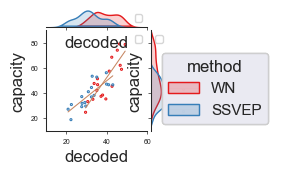

In [193]:
g = sns.JointGrid(data=relation[relation.method=='WN'], x="decoded", y="capacity",height=4*cm,)

for ax in g.fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.legend(fontsize=7)

ax1,ax2,ax3 = g.fig.axes


(
    so.Plot(relation, x='decoded', y='capacity', color='method')
    .on(ax1)
    .add(so.Dots(pointsize=1.5), so.Jitter(.2))
    .add(so.Line(linewidth=0.75, color='#C68662'), so.PolyFit(order=1),)
    .scale(color='Set1')
    .plot()
)

(
    so.Plot(relation, x='decoded', color='method')
    .on(ax2)
    .add(so.Area(), so.KDE(bw_adjust=0.8))
    .scale(color='Set1')
    .plot()

)

(
    so.Plot(relation, y='capacity', color='method')
    .on(ax3)
    .add(so.Area(), so.KDE(bw_adjust=0.8))
    .scale(color='Set1')
    .plot()
    .save('../images/mainFig3/fig3e.png', dpi=300, bbox_inches='tight')
    .save('../images/mainFig3/fig3e.svg', dpi=300,)

)

ax1.set_xlim([10,60])
ax1.set_ylim([10,90])

## (2)

In [35]:
capacity = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
        f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
        capacity.append(f)

capacity = pd.concat(capacity, ignore_index=True).drop_duplicates()
capacity = capacity[capacity.f >= 1]
capacity.head()

,Unnamed: 0,f,ubSNR,ubrate,sPower,nPower,X,exp,subject,ubINFO,tag
2,2,1.666667,0.193397,0.408595,1.733072e-13,1.201557e-12,1.374864e-12,compare,yangyuxing,77.584867,WN
3,3,2.500000,0.398210,0.314415,1.059493e-13,3.383480e-13,4.442973e-13,compare,yangyuxing,77.584867,WN
4,4,3.333333,0.412538,0.475092,1.174508e-13,3.594742e-13,4.769250e-13,compare,yangyuxing,77.584867,WN
5,5,4.166667,0.701748,0.641956,1.277647e-13,2.090048e-13,3.367696e-13,compare,yangyuxing,77.584867,WN
6,6,5.000000,0.916559,0.971766,1.881602e-13,2.370533e-13,4.252135e-13,compare,yangyuxing,77.584867,WN


# Figs 3(f) The implication of latency

In [39]:
evokeds = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'evoked.csv'):
        f = pd.read_csv(subFolder+os.sep+'evoked.csv')
        evokeds.append(f)

evokeds = pd.concat(evokeds, ignore_index=True)
evokeds = evokeds[(evokeds['filtered']=='no')&(evokeds.subject.isin(pickSUB))].groupby(by=['time','tag','subject'],as_index=False).mean()
evokeds.head()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_25215/1581287196.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,time,tag,subject,Unnamed: 0,class,evoked
0,0.0,SSVEP,chenyuzhen,10019.5,60.5,3.332837e-08
1,0.0,SSVEP,fanzixiao,10019.5,60.5,1.011380e-07
2,0.0,SSVEP,hanyue,10019.5,60.5,-2.911907e-08
3,0.0,SSVEP,huangzixun,10019.5,60.5,-6.305447e-08
4,0.0,SSVEP,jiaqi,10019.5,60.5,-1.904053e-08


In [40]:
latency = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'latency.csv'):
        f = pd.read_csv(subFolder+os.sep+'latency.csv')
        latency.append(f)
latency = pd.concat(latency, ignore_index=True)
latency.head()

,Unnamed: 0,accuracy,winLEN,ITR,method,cv,latency,seed,tag,subject
0,0,0.225,0.1,45.654855,random,0,0.02,0,WN,yangyuxing
1,1,0.300,0.1,74.085564,random,1,0.02,0,WN,yangyuxing
2,2,0.375,0.1,106.411771,random,2,0.02,0,WN,yangyuxing
3,3,0.150,0.1,21.949590,random,3,0.02,0,WN,yangyuxing
4,4,0.250,0.1,54.659831,random,4,0.02,0,WN,yangyuxing


In [41]:
latency[latency.subject.isin(pickSUB)].groupby(by=['latency','winLEN','tag']).mean()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_25215/2701572180.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


Unnamed: 0  accuracy         ITR   cv  seed
latency winLEN tag                                               
0.02    0.1    SSVEP        83.5  0.173125   35.174841  3.5   0.0
               WN            3.5  0.167969   32.179115  3.5   0.0
0.06    0.1    SSVEP        91.5  0.416250  133.246648  3.5   0.0
               WN           11.5  0.455156  153.079597  3.5   0.0
0.10    0.1    SSVEP        99.5  0.662344  268.068879  3.5   0.0
               WN           19.5  0.697656  292.789037  3.5   0.0
0.14    0.1    SSVEP       107.5  0.727500  309.221889  3.5   0.0
               WN           27.5  0.819844  376.856220  3.5   0.0
0.18    0.1    SSVEP       115.5  0.727187  309.734135  3.5   0.0
               WN           35.5  0.835938  389.525600  3.5   0.0
0.22    0.1    SSVEP       123.5  0.766406  337.947663  3.5   0.0
               WN           43.5  0.842500  396.102728  3.5   0.0
0.26    0.1    SSVEP       131.5  0.820625  378.998110  3.5   0.0
               WN           51.5  0.840000  394.474954  3.5   0.0
0.30    0.1    SSVEP       139.5  0.819375  376.222400  3.5   0.0
               WN           59.5  0.844688  398.447244  3.5   0.0
0.34    0.1    SSVEP       147.5  0.779219  347.693034  3.5   0.0
               WN           67.5  0.834688  391.213450  3.5   0.0
0.38    0.1    SSVEP       155.5  0.719844  306.599924  3.5   0.0
               WN           75.5  0.808906  372.808537  3.5   0.0

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_25215/2283188319.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


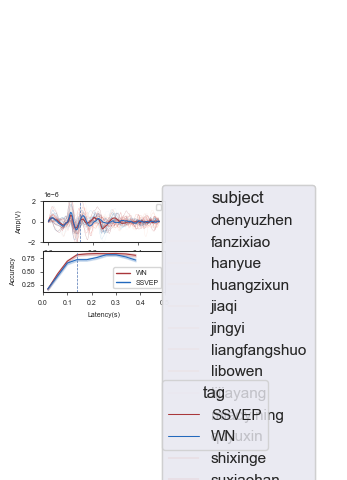

In [42]:
subs = []
aveLatency = latency[(latency.subject.isin(pickSUB)) & (
    latency.winLEN == 0.1) & (latency.latency <= 0.38)]
aveEvoked  = evokeds.groupby(by=['time','tag'],as_index=False).mean()

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(4*cm,3*cm),)

sns.lineplot(data=aveLatency, x='latency', y='accuracy', hue='tag', palette=[red,blue],lw=0.75)

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.legend(fontsize=5, markerscale=0.4)
(
    so.Plot(evokeds[evokeds.tag=='SSVEP'], x="time", y="evoked",color='subject')
    .on(ax1)
    .add(so.Line(alpha=0.5, linewidth=0.2,))
    .scale(color="Blues")
    .plot()

)

(
    so.Plot(evokeds[evokeds.tag=='WN'], x="time", y="evoked",color='subject')
    .on(ax1)
    .add(so.Line(alpha=0.4, linewidth=0.2,))
    .scale(color="Reds")
    .plot()

)

(
    so.Plot(aveEvoked, x="time", y="evoked",color='tag')
    .on(ax1)
    .add(so.Line(linewidth=.75,))
    .scale(color=(red,blue))
    .plot()
    .save('../images/mainFig3/fig3f.svg', dpi=300)

)
ax1.set_ylabel('Amp(V)')
ax1.set_xlabel('Time(s)')

ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Latency(s)')

ax2.set_xlim(0,0.5)
ax1.set_ylim(-2e-6,2e-6)

ax1.axvline(x=0.14,linestyle='dashed',lw=0.5)
ax2.axvline(x=0.14, linestyle='dashed', lw=0.5)

fig.savefig('../images/mainFig3/fig3f.png', dpi=400, bbox_inches='tight')
fig.savefig('../images/mainFig3/fig3f.svg', dpi=400, bbox_inches='tight')

# Fig 3(d): Best of the best

In [144]:
best = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'best.csv'):
        f = pd.read_csv(subFolder+os.sep+'best.csv')
        best.append(f)

best = pd.concat(best, ignore_index=True)
best = best.groupby(
    ['subject', 'winLEN', 'method'], as_index=False).mean()
best.head()

,subject,winLEN,method,Unnamed: 0,accuracy,ITR,cv,seed,score
0,fanzixiao,0.02,SSVEP,126.5,0.200000,19.113256,3.5,0.0,0.196875
1,fanzixiao,0.02,WN,38.5,0.265625,31.193719,3.5,0.0,0.253125
2,fanzixiao,0.04,SSVEP,127.5,0.418750,32.260751,3.5,0.0,0.428125
3,fanzixiao,0.04,WN,39.5,0.550000,49.310218,3.5,0.0,0.562500
4,fanzixiao,0.06,SSVEP,128.5,0.593750,37.021146,3.5,0.0,0.603125


In [32]:
bestSUB = ['jingyi','yaofeifan','yangyuxing','zhouyuqing','fanzixiao']

ValueError: Could not interpret value `best` for parameter `y`

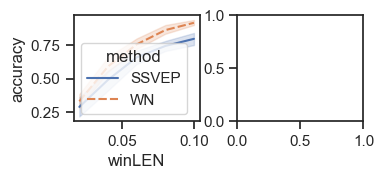

In [34]:
sns.set_theme(style='ticks')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.5*cm, 3.5*cm))

plt.subplots_adjust(wspace=0.3)

sns.lineplot(data=best[best.subject.isin(bestSUB)], x='winLEN', y='accuracy',
                hue='method', ax=ax1, style='method',)

sns.lineplot(data=best[best.subject.isin(bestSUB)], x='winLEN', y='best',
                hue='method', ax=ax2, style='method',)

ax1.set_ylim(0.2,1)

ax1.set_ylabel('Accuracy', fontdict=fontdict)
ax2.set_ylabel('ITR(bps)', fontdict=fontdict)

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xlabel('Time(s)', fontdict=fontdict)
    ax.legend(fontsize=5, markerscale=0.4)

plt.show()

# fig.savefig('../images/mainFig3/fig3a.png', dpi=400, bbox_inches='tight')

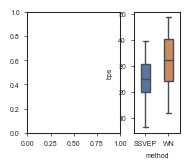

In [46]:

sns.set_theme(style='ticks',font='Arial',rc={"lines.linewidth": 1,'font.size':5,'legend.fontsize':5,'legend.title_fontsize':5,'axes.labelsize':5,'xtick.labelsize':5,'ytick.labelsize':5,})

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5*cm,4*cm),gridspec_kw={'width_ratios':[2,1]})

sns.boxplot(data=best[best.winLEN==0.1],x='method',y='bps',width=0.4,ax=ax2)


for ax in fig.axes:
    ax.tick_params(labelsize=5, width=0.5, length=2, which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)


In [47]:
import sys
sys.path.append('../compare')
from compare.utils import ITR

In [48]:
ITR(40,0.98,0.3)

380.6084630976222